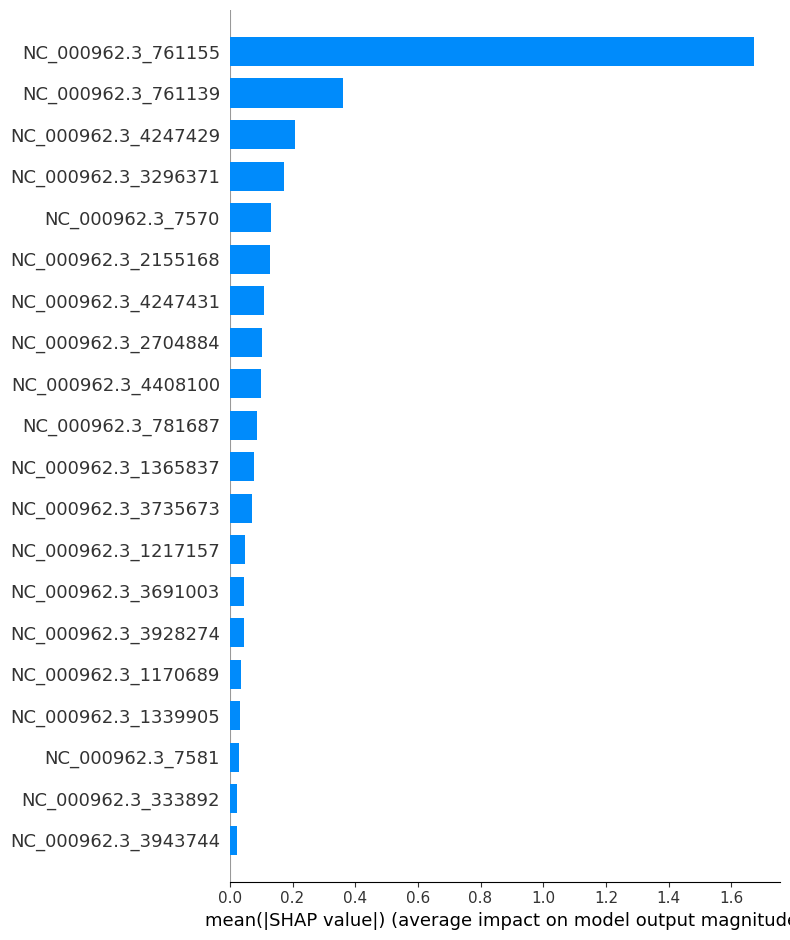

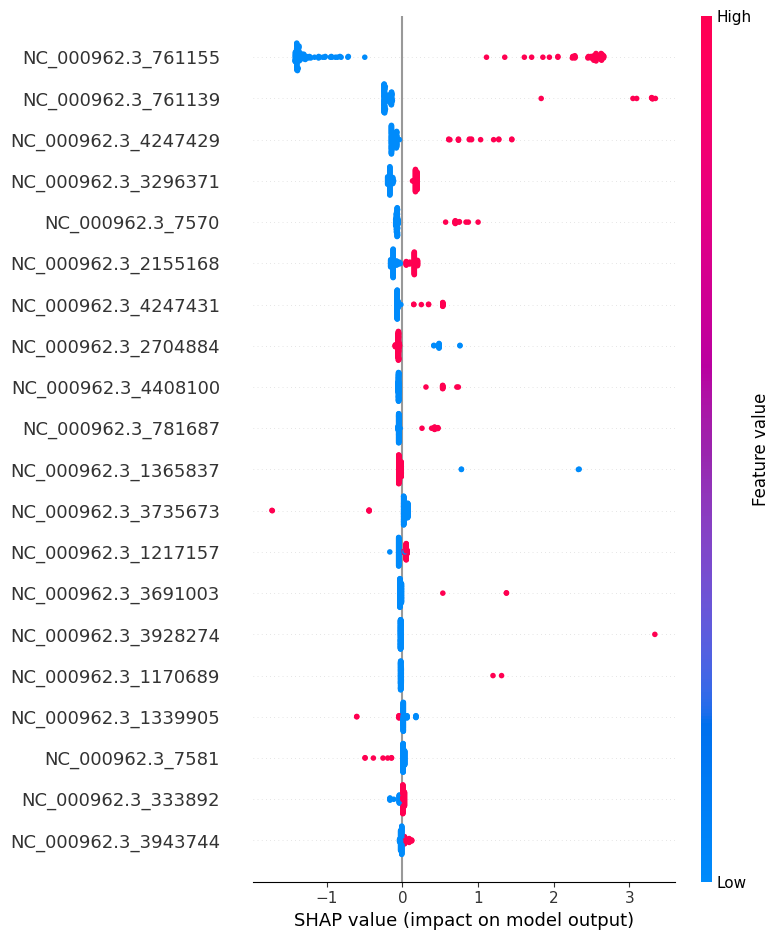

13514
13514


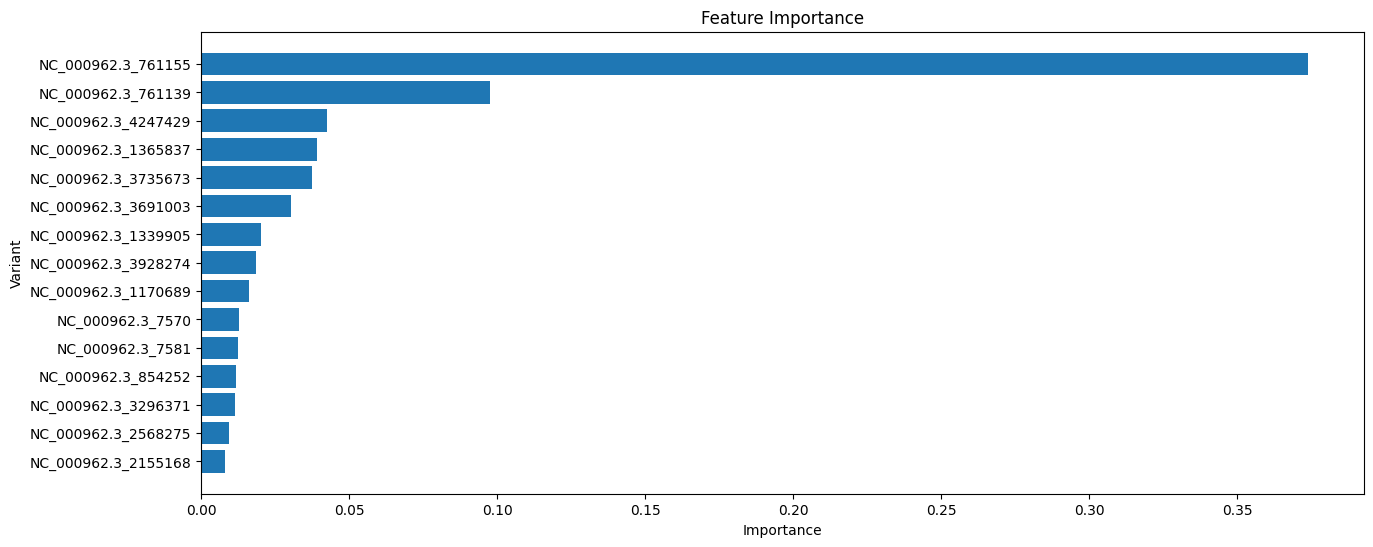

In [78]:
import pandas as pd
import numpy as np

import shap
import xgboost
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv('./Data/rifampicin.csv')
data2pre = pd.read_csv('./Data/rifampicin_to_predict_MTB.csv')
# #Split data into features and labels
X = data.iloc[:, 1:-1] 
X_2pre = data2pre.iloc[:, 1:-1]
Y = data.iloc[:,-1] # last column label

import pickle
model = pickle.load(open('rifampicin_GBC.sav', 'rb'))

#all dataset
explainer = shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap_test_values = shap.TreeExplainer(model).shap_values(X_2pre)
shap_values2 = explainer(X_2pre)

# Figure1：summary_plot
shap.summary_plot(shap_values,X, plot_type="bar")


# Figure2：SHAP plot
shap.summary_plot(shap_values, X) 


#Figure3: feature_importances

feature_importances = model.feature_importances_
feature_names = X.columns 
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
# Plot feature_importances
plt.figure(figsize=(15, 6))
plt.barh(feature_importance_df['feature'][:15], feature_importance_df['importance'][:15])  # Top15
plt.xlabel('Importance')
plt.ylabel('Variant')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

In [ ]:

#force_plots
shap.initjs()
shap.plots.force(shap_values2[44])